# Taxa present in more than one signature for the aerophilicity dataset of bugphyzz

In [1]:
suppressMessages({
    library(microbeScores)
    library(magrittr)
    library(ComplexHeatmap)    
})

All aerophilicity signatures as a binary matrix:

In [2]:
x <- bugphyzzSignatureMatrix(keyword = "aerophilicity", taxa_col = "NCBI_ID")

In [3]:
head(x)

,aerobic,aerotolerant,anaerobic,facultatively anaerobic,microaerophilic,obligately aerobic,obligately anaerobic
745,1,0,1,1,1,0,0
713,1,0,1,1,0,0,0
419014,1,0,1,1,0,0,0
1813,1,0,1,1,0,0,0
908626,1,0,1,1,0,0,0
1386,1,0,1,1,0,0,0


In [4]:
taxa_names <- bugphyzz::ncbiRank(rownames(x))

In [5]:
head(taxa_names)

NCBI_ID,kingdom,phylum,class,order,family,genus,species
<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
745,Bacteria,Proteobacteria,Gammaproteobacteria,Pasteurellales,Pasteurellaceae,Pasteurella,NA
713,Bacteria,Proteobacteria,Gammaproteobacteria,Pasteurellales,Pasteurellaceae,Actinobacillus,NA
419014,Bacteria,Actinobacteria,Actinomycetia,Bifidobacteriales,Bifidobacteriaceae,Alloscardovia,NA
1813,Bacteria,Actinobacteria,Actinomycetia,Pseudonocardiales,Pseudonocardiaceae,Amycolatopsis,NA
908626,Bacteria,Actinobacteria,Actinomycetia,Kineosporiales,Kineosporiaceae,Angustibacter,NA
1386,Bacteria,Firmicutes,Bacilli,Bacillales,Bacillaceae,Bacillus,NA


In [6]:
new_rownames <- paste0(taxa_names$genus, " - ", rownames(x))

In [7]:
head(new_rownames)

[1] "Pasteurella - 745"      "Actinobacillus - 713"   "Alloscardovia - 419014"
[4] "Amycolatopsis - 1813"   "Angustibacter - 908626" "Bacillus - 1386"

In [8]:
rownames(x) <- new_rownames

In [9]:
multiple_sets <- x[rowSums(x) > 1,] # Genera present in more than one signature

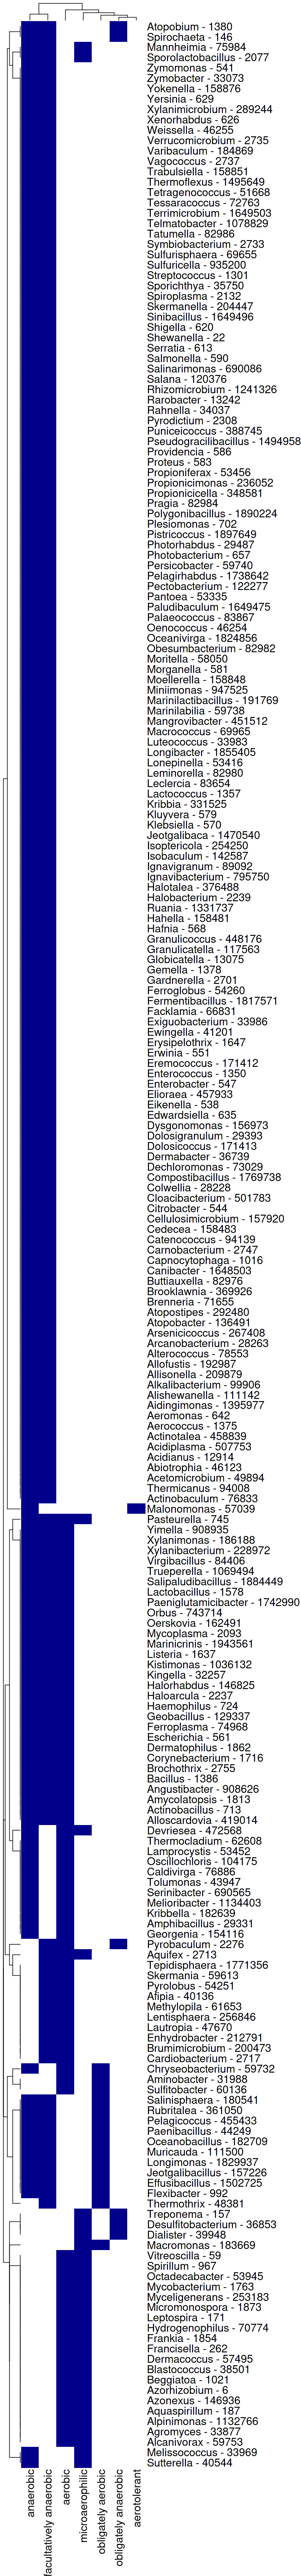

In [10]:
options(repr.plot.height = 50, repr.plot.height = 60)
ht  <- ComplexHeatmap::Heatmap(multiple_sets, col = c("white", "darkblue"), 
                        row_names_gp = grid::gpar(fontsize = 18),
                        column_names_gp = grid::gpar(fontsize = 18),
                        show_heatmap_legend = FALSE)
ComplexHeatmap::draw(ht, padding = grid::unit(c(2, 2, 2, 30), "mm"))

## Comparison with the nychanes biosis signatures

In [11]:
# Load the biosis tsv file
biosis.tsv <- system.file("extdata/biosis.tsv", package = "nychanesmicrobiome")
biosis <- readr::read_tsv(biosis.tsv, col_types = "cc") %>% 
    magrittr::set_colnames(c("Genus", "Attribute"))
head(biosis)

Genus,Attribute
<chr>,<chr>
Acholeplasma,F Anaerobic
Actinomycetaceae,F Anaerobic
Aeriscardovia,Aerobic
Aerococcus,F Anaerobic
Aggregatibacter,F Anaerobic
Alloscardovia,Anaerobic


In [12]:
# convert the biosis tsv file into a binary matrix of signatures
biosis_matrix <- lapply(unique(biosis$Attribute), function(x) {
    attribute_taxa <- biosis$Genus[biosis$Attribute == x]
    biosis$Genus %in% attribute_taxa
}) %>% 
    magrittr::set_names(unique(biosis$Attribute)) %>% 
    as.data.frame() %>% 
    as.matrix()
colnames(biosis_matrix) <- unique(biosis$Attribute)
rownames(biosis_matrix) <- biosis$Genus
mode(biosis_matrix) <- "integer"
head(biosis_matrix)

,F Anaerobic,Aerobic,Anaerobic
Acholeplasma,1,0,0
Actinomycetaceae,1,0,0
Aeriscardovia,0,1,0
Aerococcus,1,0,0
Aggregatibacter,1,0,0
Alloscardovia,0,0,1


In [13]:
# Names that appear in both bugphyzz and nychanes biosis signatures
matching_names <- purrr::map_chr(biosis$Genus, ~ {
    z  <- grep(.x, rownames(x), value = TRUE)
    if (!length(z)) {
        NA
    } else {
        z
    }
}) %>% 
    na.omit() %>% 
    as.character()

In [14]:
matching_names

[1] "Acholeplasma - 2147"       "Aeriscardovia - 240233"   
 [3] "Aerococcus - 1375"         "Alloscardovia - 419014"   
 [5] "Alpinimonas - 1132766"     "Alysiella - 194195"       
 [7] "Anaerococcus - 165779"     "Anaeroglobus - 156454"    
 [9] "Butyrivibrio - 830"        "Cardiobacterium - 2717"   
[11] "Catonella - 43996"         "Collinsella - 102106"     
[13] "Cytophaga - 978"           "Dialister - 39948"        
[15] "Eikenella - 538"           "Fastidiosipila - 236752"  
[17] "Fluviicola - 332102"       "Fusobacterium - 848"      
[19] "Gardnerella - 2701"        "Granulicatella - 117563"  
[21] "Johnsonella - 43994"       "Kingella - 32257"         
[23] "Mogibacterium - 86331"     "Moraxella - 475"          
[25] "Mycoplasma - 2093"         "Oribacterium - 265975"    
[27] "Parvimonas - 543311"       "Peptococcus - 2740"       
[29] "Peptoniphilus - 162289"    "Peptostreptococcus - 1257"
[31] "Photobacterium - 657"      "Pseudoramibacter - 113286"
[33] "Scardovia - 196081"        "Shuttleworthia - 177971"  
[35] "Simonsiella - 71"          "Sneathia - 168808"        
[37] "Solobacterium - 123375"    "Spirochaeta - 146"        
[39] "Abiotrophia - 46123"       "Acidovorax - 12916"       
[41] "Acinetobacter - 469"       "Actinobacillus - 713"     
[43] "Arcanobacterium - 28263"   "Atopobium - 1380"         
[45] "Bacillus - 1386"           "Bacteroides - 816"        
[47] "Bergeyella - 59735"        "Bifidobacterium - 1678"   
[49] "Bradyrhizobium - 374"      "Bulleidia - 118747"       
[51] "Capnocytophaga - 1016"     "Chryseobacterium - 59732" 
[53] "Comamonas - 283"           "Corynebacterium - 1716"   
[55] "Desulfobulbus - 893"       "Desulfomicrobium - 898"   
[57] "Desulfovibrio - 872"       "Enterobacter - 547"       
[59] "Filifactor - 44259"        "Flavobacterium - 237"     
[61] "Gemella - 1378"            "Haemophilus - 724"        
[63] "Kocuria - 57493"           "Lactobacillus - 1578"     
[65] "Lactococcus - 1357"        "Lautropia - 47670"        
[67] "Leptotrichia - 32067"      "Megasphaera - 906"        
[69] "Mobiluncus - 2050"         "Neisseria - 482"          
[71] "Paludibacter - 346096"     "Pedobacter - 84567"       
[73] "Porphyromonas - 836"       "Prevotella - 838"         
[75] "Pseudomonas - 286"         "Roseburia - 841"          
[77] "Selenomonas - 970"         "Slackia - 84108"          
[79] "Streptococcus - 1301"      "Tannerella - 195950"      
[81] "Treponema - 157"           "Veillonella - 29465"

In [15]:
# New biosis matrix with only matching names
new_biosis_matrix <- biosis_matrix[sub(" .+", "", matching_names),]

In [16]:
# New bugphyzz matrix with only matching names and ordered
new_matrix = x[matching_names, ][do.call(order, as.data.frame(x[matching_names, ]) * -1), ]
rownames(new_matrix) <- sub(" .*", "", rownames(new_matrix))

#### Heatmap comparing matching taxa in bugphyzz and nychanes biosis signatures

In [17]:
# Bugphyzz heatmap
ht1  <- ComplexHeatmap::Heatmap(new_matrix, col = c("white", "darkblue"), 
                        row_names_gp = grid::gpar(fontsize = 18), cluster_columns = FALSE,
                        column_names_gp = grid::gpar(fontsize = 18), cluster_rows = FALSE, column_title_gp = gpar(fontsize = 20),
                        show_heatmap_legend = FALSE, column_title = "bugphyzz")
# NYC biosis heatmap
ht2  <- ComplexHeatmap::Heatmap(new_biosis_matrix[rownames(new_matrix),], col = c("white", "darkred"), 
                        row_names_gp = grid::gpar(fontsize = 18), cluster_columns = FALSE, column_title_gp = gpar(fontsize = 20),
                        column_names_gp = grid::gpar(fontsize = 18), cluster_rows = FALSE,
                        show_heatmap_legend = FALSE, column_title = "nychanes - biosis")

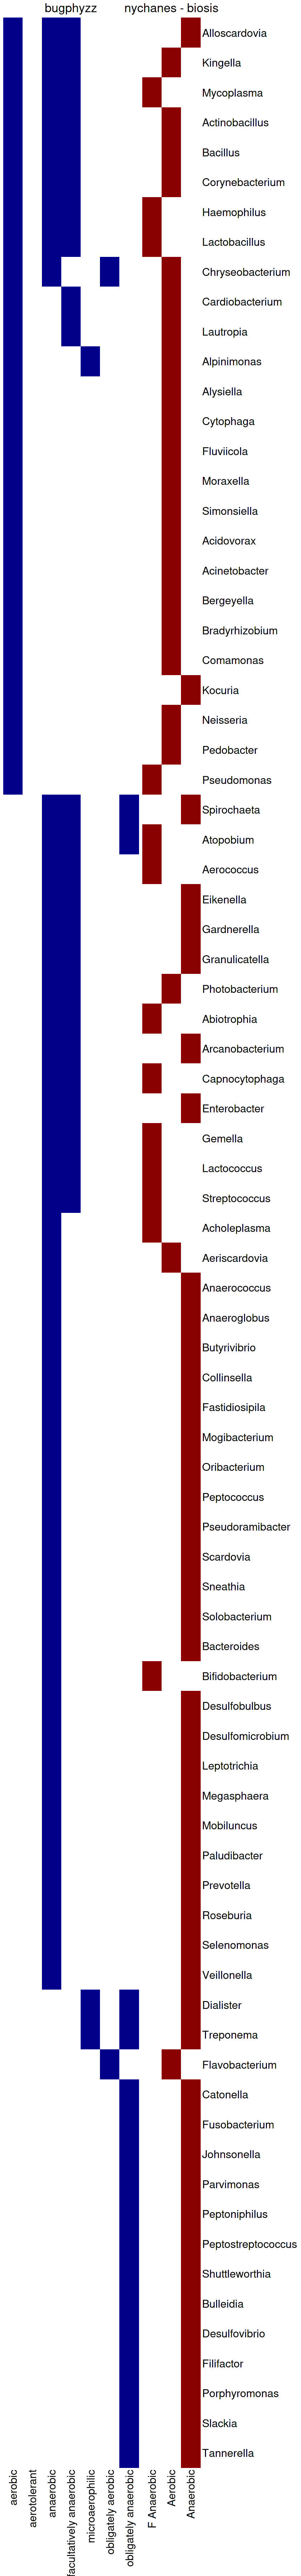

In [18]:
ht1 + ht2